In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
websites = pd.read_csv(r"C:\Users\Administrator\OneDrive - UWE Bristol\Desktop\data_internship\judithweb.csv")

In [3]:
ratings = pd.read_csv(r"C:\Users\Administrator\OneDrive - UWE Bristol\Desktop\data_internship\judithrat.csv")

In [4]:
websites.head()

,websiteId,website,categories
0,1,homelet.co.uk,rental rights|tenancy rights|Landlord rights|s...
1,2,NRLA.org.uk,rental rights|tenancy rights|Landlord rights|s...
2,3,Landlordlaw.co.uk,rental rights|tenancy rights|Landlord rights|s...
3,4,Housingrights.org.uk,rental rights|tenancy rights|Landlord rights|s...
4,5,pettyson.co.uk,rental rights|tenancy rights|Landlord rights|s...


In [5]:
ratings.head()

,userId,websiteId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
final_dataset = ratings.pivot(index='websiteId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
websiteId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
websiteId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
no_user_voted = ratings.groupby('websiteId')['rating'].agg('count')
no_website_voted = ratings.groupby('userId')['rating'].agg('count')

In [10]:
no_website_voted

userId
1       232
2        29
3        39
4       216
5        44
6       314
7       152
8        47
9        46
10      140
11       64
12       32
13       31
14       48
15      135
16       98
17      105
18      502
19      703
20      242
21      443
22      119
23      121
24      110
25       26
26       21
27      135
28      570
29       81
30       34
       ... 
581      40
582      56
583      56
584      83
585      61
586     208
587     165
588      56
589      40
590     728
591      54
592      94
593     103
594     232
595      20
596     411
597     443
598      21
599    2478
600     763
601     101
602     135
603     943
604     100
605     221
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [186]:
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
6         102
7          54
8           8
9          16
10        132
11         70
12         19
13          8
14         18
15         13
16         82
17         67
18         20
19         88
20         15
21         89
22         36
23         16
24         28
25         76
26         13
27          9
28         11
29         38
30          3
         ... 
188189      1
188301      3
188675      1
188751      1
188797      1
188833      1
189043      1
189111      1
189333      2
189381      1
189547      1
189713      1
190183      1
190207      1
190209      1
190213      1
190215      1
190219      1
190221      1
191005      1
193565      1
193567      1
193571      1
193573      1
193579      1
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

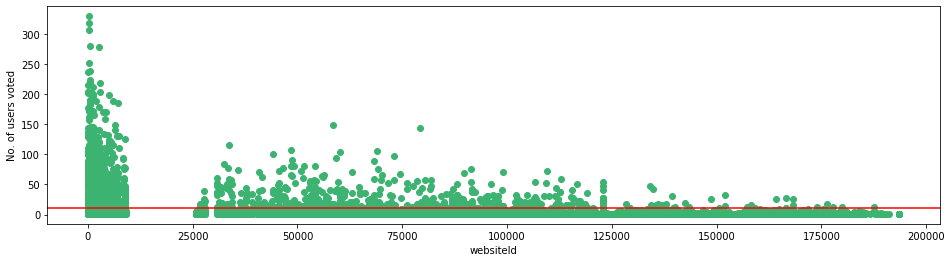

In [11]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('websiteId')
plt.ylabel('No. of users voted')
plt.show()

In [12]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted >5 ].index,:]# IT was 10 in place of 5

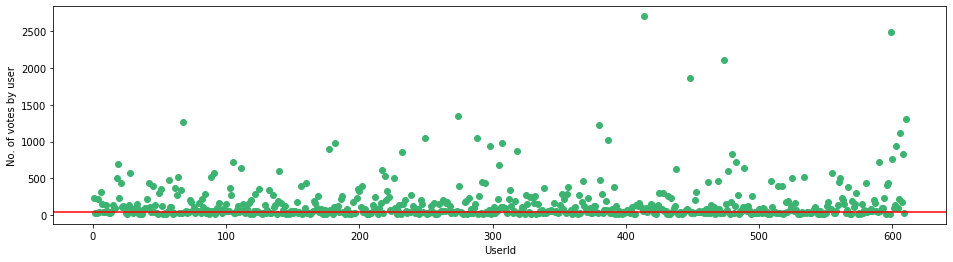

In [14]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_website_voted.index,no_website_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [15]:
final_dataset=final_dataset.loc[:,no_website_voted[no_website_voted > 5].index]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
websiteId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [17]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [18]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [19]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                 radius=1.0)

In [30]:
def get_website_recommendation(web_name):
    n_web_to_reccomend = 2
    web_list = websites[websites['website'].str.contains(web_name)]  
    if len(web_list):        
        movie_idx= web_list.iloc[0]['websiteId']
        movie_idx = final_dataset[final_dataset['websiteId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_web_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['websiteId']
            idx = websites[websites['websiteId'] == movie_idx].index
            recommend_frame.append({'Category':websites.iloc[idx]['website'].values[0]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_web_to_reccomend+1))
        return df
    else:
        return "No websites found. Please check your input"

In [31]:
get_website_recommendation('tenancy rights')

,Category
1,openrent.co.uk
2,Lawsociety.org.uk


In [32]:
get_website_recommendation('rent increase')

,Category
1,international student rights.org.uk
2,gov.uk


In [34]:
get_website_recommendation('fire safety')

,Category
1,therentersguide.co.uk
2,rightsofwomen.org.uk


In [35]:
get_website_recommendation('student tenant rights')

,Category
1,Housingrights.org.uk
2,gov.uk


In [36]:
get_website_recommendation('rent increase')

,Category
1,international student rights.org.uk
2,gov.uk


In [37]:
get_website_recommendation('first house')

,Category
1,lease-advice.org
2,rental laws
